# Calgary Crime Data Analysis and Neural Network Prediction

The aim of this project is to use the Crime and Disorder Data provided by the City of Calgary's data website to analyze the data and predict the number of crimes that will occur in the future. The data is from 2018 to 2024 and contains the number of crimes that occurred in Calgary for each month. After throughly analyzing the data,  I will be building a neural network model and optimizing it to predict the number of crimes that will occur in the future.

## Data Dictionary

| Column Name | Description |
| --- | --- |
|Community Name| The name of the community in Calgary|
|Category| The type of crime that occurred|
|Crime Count| The number of crimes that occurred in that month|
|Year| The year the crime occurred|
|Month| The month the crime occurred|

## Strategy
1. Loading the data and understanding the data
2. Data Preprocessing - cleaing the data and preparing it for analysis
3. Exploratory Data Analysis - Analyzing the data to understand the trends and patterns
4. Building a Neural Network Model
5. Optimizing the model
6. Training the model
7. Predicting the number of crimes that will occur in the future

In [4]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
#loading the dataset
df = pd.read_csv('/content/Community_Crime_Statistics_20240522.csv')
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


Here the is the representation of first 5 records of the data, which gives a brief informaton about the data. Since the dataset is alphabetically sorted by the community name, the data is not in a chronological order.

### Data Preprocessing

In [6]:
#shape of the dataset
df.shape

(70661, 5)

Here we have bearly 70661 records and 5 columns. Therefore, we have enough data for preparing an analysis and developing a model for prediction.

In [7]:
#checking for missing values
df.isnull().sum()

Community      0
Category       0
Crime Count    0
Year           0
Month          0
dtype: int64

The dataset is pretty clean and does not have any missing values.

In [8]:
#checking for the datatypes
df.dtypes

Community      object
Category       object
Crime Count     int64
Year            int64
Month           int64
dtype: object

Making sure that the columns have correct datatype, before I proceed with the analysis.

In [9]:
#Descriptive statistics
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


## Exploratory Data Analysis
In the exploraotry data analysis, I will be analyzing the data to understand the trends and patterns in the data. Through this analysis, I will be able to understand the data better and build a better model for prediction.

### Community Distribution

Text(0, 0.5, '')

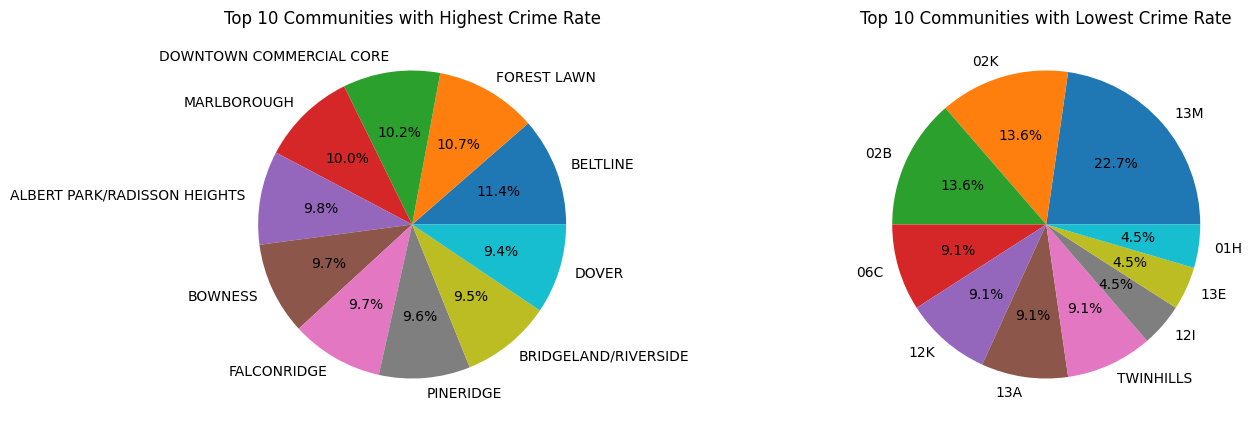

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Top 10 Communities with Highest Crime Rate
df['Community'].value_counts().head(10).plot.pie(autopct='%1.1f%%', ax = ax[0])
ax[0].set_title('Top 10 Communities with Highest Crime Rate')
ax[0].set_ylabel('')

#Top 10 Communities with Lowest Crime Rate
df['Community'].value_counts().tail(10).plot.pie(autopct='%1.1f%%', ax = ax[1])
ax[1].set_title('Top 10 Communities with Lowest Crime Rate')
ax[1].set_ylabel('')


These pie charts show the distribution of crimes in each community. The first pie chart shows the top 10 most dangerous communities in Calgary. The second pie chart shows the distribution of top 10 safest communities in Calgary. In the first pie chart, Beltline is the most dangerous community in Calgary with 11.4% of the top crimes in number, followed by Forest Lawn with 10.7% and Downtown Commercial Core with 10.2%. In the second pie chart, the safest community is 13M with 22.7% of the least crimes in number, followed by 02K with 13.6% and 02B with 13.6%.

*This is note that all these observations are without any bias and completely based on the data from the city of Calgary website.*

### Crime Category Distribution

Text(0, 0.5, '')

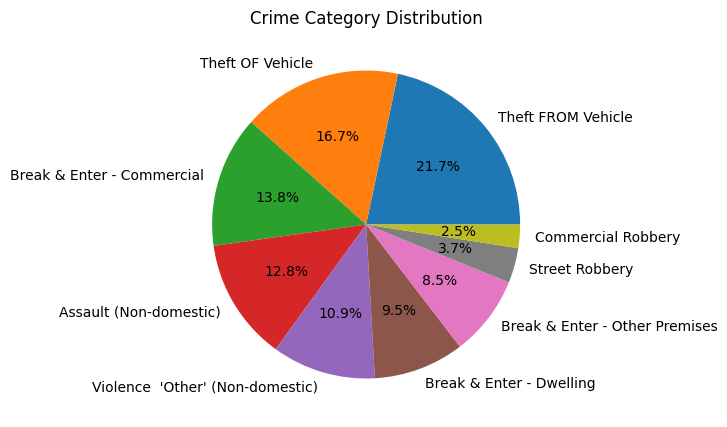

In [11]:
plt.figure(figsize=(5, 5))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Crime Category Distribution')
plt.ylabel('')

This graph shows the distribution of crimes in each category by the number of crimes. The top crime category is Theft from Vehicle with 21.7% of the total crimes, followed by Theft of Vehicle with 16.7% and Break and Enter - Commercial with 13.8%. The least crime category inc;udes commerical or street robbery.

### Crime Reportings Over the Years

Text(0.5, 1.0, 'Crime Reportings by Year')

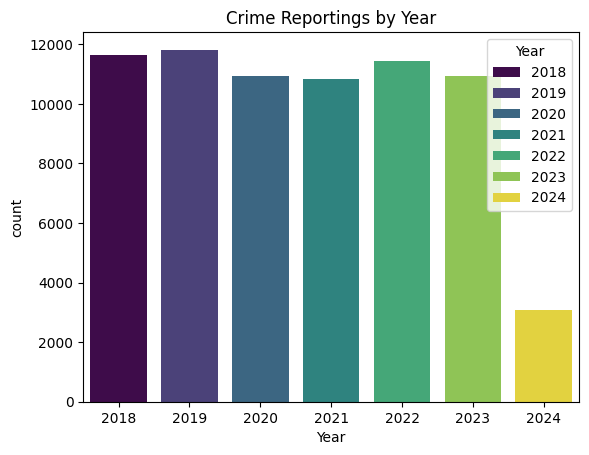

In [12]:
sns.countplot(x = 'Year', data = df, hue = 'Year', palette='viridis').set_title('Crime Reportings by Year')

This bar graph shows the distribution of number of crimes reported in the year. The year 2019 had the highest reportings of crimes followed by 2022 and 2018. The crime reportings in 2024 are less due to limited data till April 2024.

### Crime Reportings by Month

Text(0.5, 1.0, 'Crime Reportings by Month')

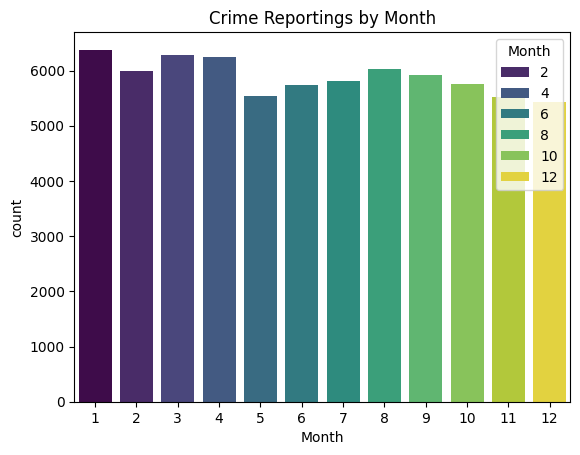

In [13]:
sns.countplot(x = 'Month', data = df, hue = 'Month', palette='viridis').set_title('Crime Reportings by Month')

### Community and Category Analysis

Text(0.5, 1.0, 'Top 5 Most safest Community and Crime Category')

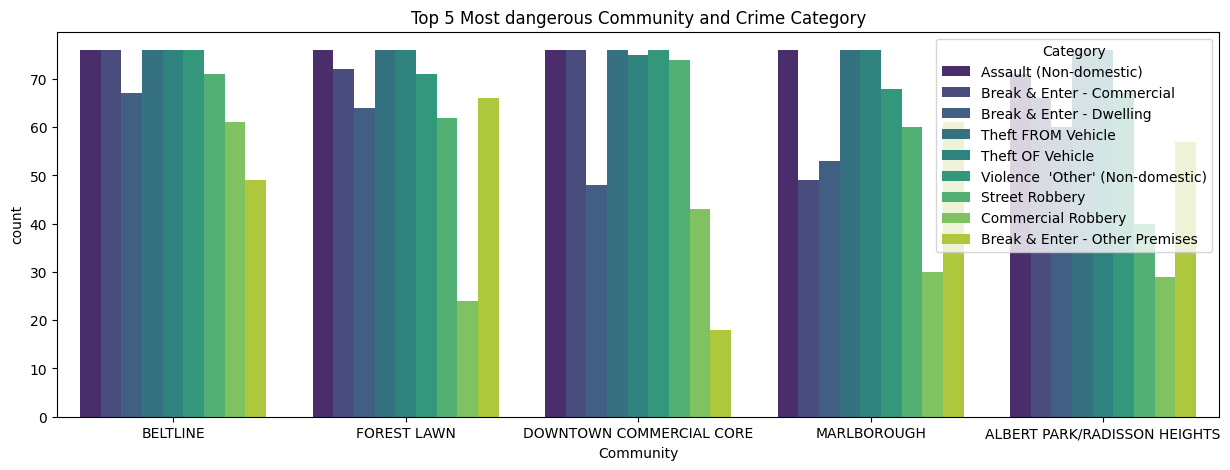

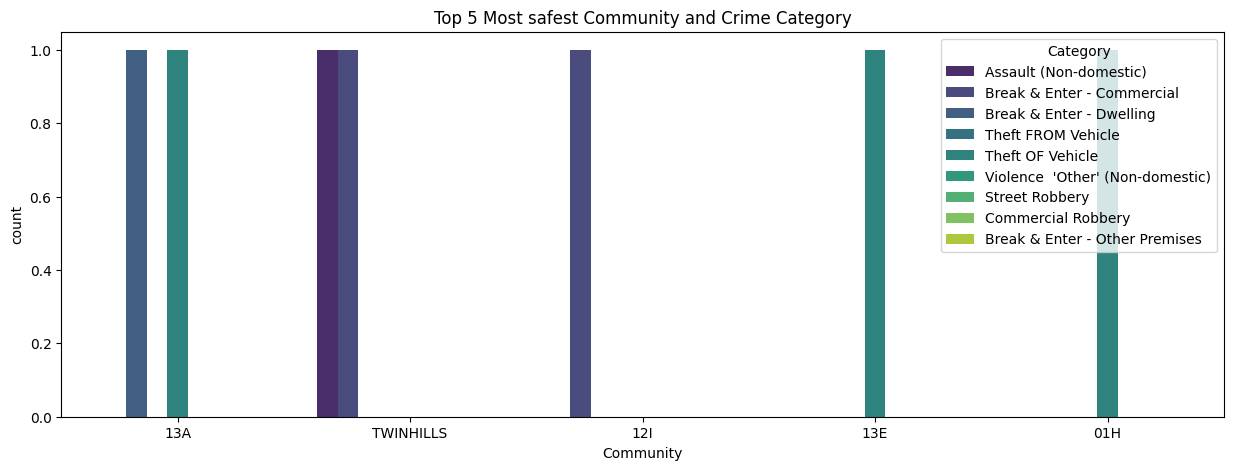

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().head(5).index).set_title('Top 5 Most dangerous Community and Crime Category')
sns.move_legend(plt.gca(), "upper right")
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().tail(5).index).set_title('Top 5 Most safest Community and Crime Category')

These two graphs shows the analysis of communities with the crime category. This help us to visualize the pattern of crime in each community. We can see that certain cateogries are more common in certain communities than others. In the top 5 dangerous communities, Forest Lawn has the highest of Break & Enter - other premises, Malbrough has the lowest Commerical Robbery. These are the few examples of the analysis.

### Year and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

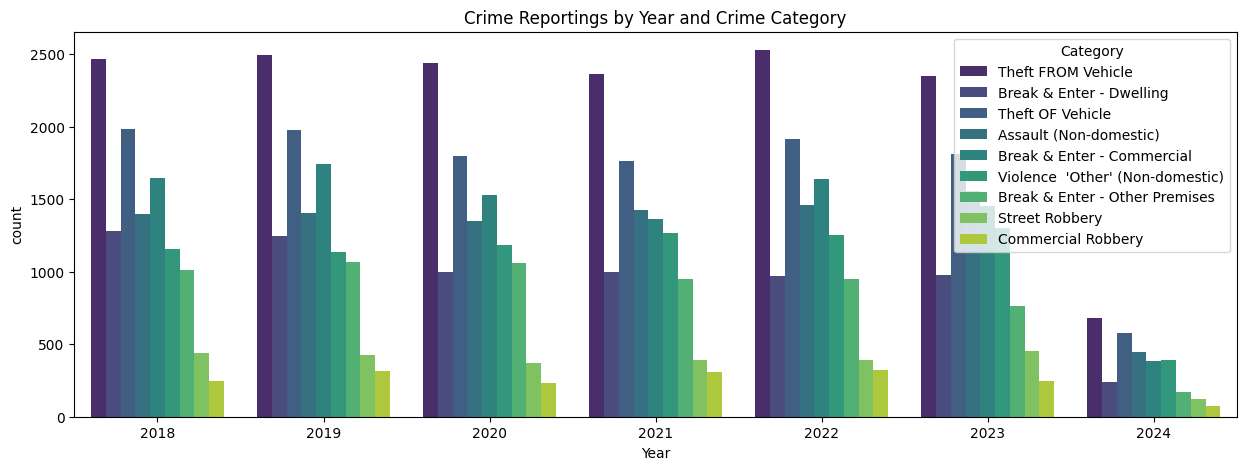

In [15]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Year', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')

### Month and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Month and Crime Category')

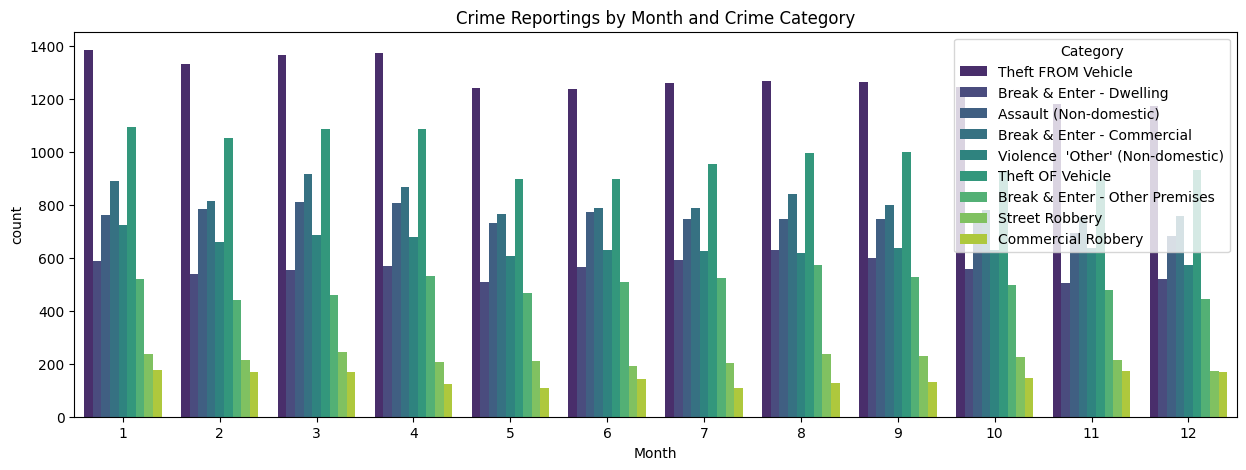

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Month', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Month and Crime Category')

From the above, graphs, charts, and visualization I have studied the patterns, trends and relationships in the data. This will help me to build a better model for prediction.

## Data Preprocessing Part 2

In [17]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding Object
le = LabelEncoder()

#Object type columns
object_type_columns = df.select_dtypes(include='object').columns

#Label Encoding
for col in object_type_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


## Building a Neural Network Model

In [18]:
# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length)].to_numpy()
        y = data.iloc[i + seq_length]['Crime Count']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [19]:
seq_length = 3
X, y = create_sequences(df, seq_length)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Building and Training the LSTM Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=16)

Epoch 1/100
3092/3092 [==============================] - 9s 3ms/step - loss: 368.3250 - val_loss: 12.2236
Epoch 2/100
3092/3092 [==============================] - 9s 3ms/step - loss: 13.1753 - val_loss: 9.2046
Epoch 3/100
3092/3092 [==============================] - 7s 2ms/step - loss: 10.1402 - val_loss: 5.4251
Epoch 4/100
3092/3092 [==============================] - 7s 2ms/step - loss: 6.6290 - val_loss: 4.8992
Epoch 5/100
3092/3092 [==============================] - 7s 2ms/step - loss: 6.6735 - val_loss: 4.9798
Epoch 6/100
3092/3092 [==============================] - 7s 2ms/step - loss: 5.6858 - val_loss: 5.1378
Epoch 7/100
3092/3092 [==============================] - 8s 3ms/step - loss: 5.8741 - val_loss: 5.0281
Epoch 8/100
3092/3092 [==============================] - 7s 2ms/step - loss: 5.6256 - val_loss: 4.8595
Epoch 9/100
3092/3092 [==============================] - 8s 3ms/step - loss: 5.8799 - val_loss: 5.1668
Epoch 10/100
3092/3092 [==============================] - 8s 2ms/ste

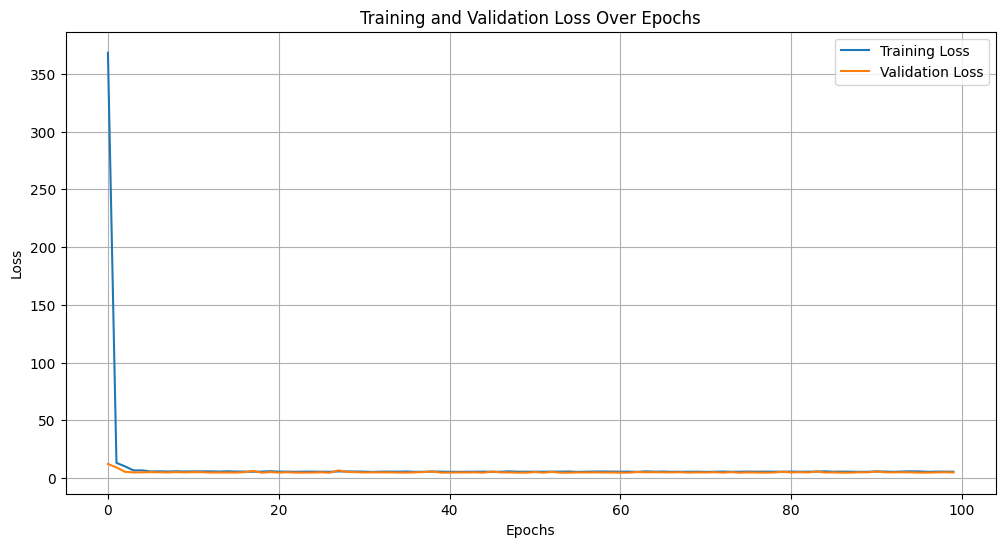

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Predictions
y_pred = model.predict(X_test)


print(f'Predictions: {y_pred.flatten()}')
print(f'True Values: {y_test.flatten()}')


332/332 [==============================] - 0s 1ms/step - loss: 4.8978
Test Loss: 4.897756576538086
332/332 [==============================] - 1s 1ms/step
Predictions: [3.5760155 2.0850606 2.3349957 ... 3.710539  1.8771566 3.2992563]
True Values: [2 1 1 ... 1 2 2]


## Model Evaluation

### Actual vs Predicted Values

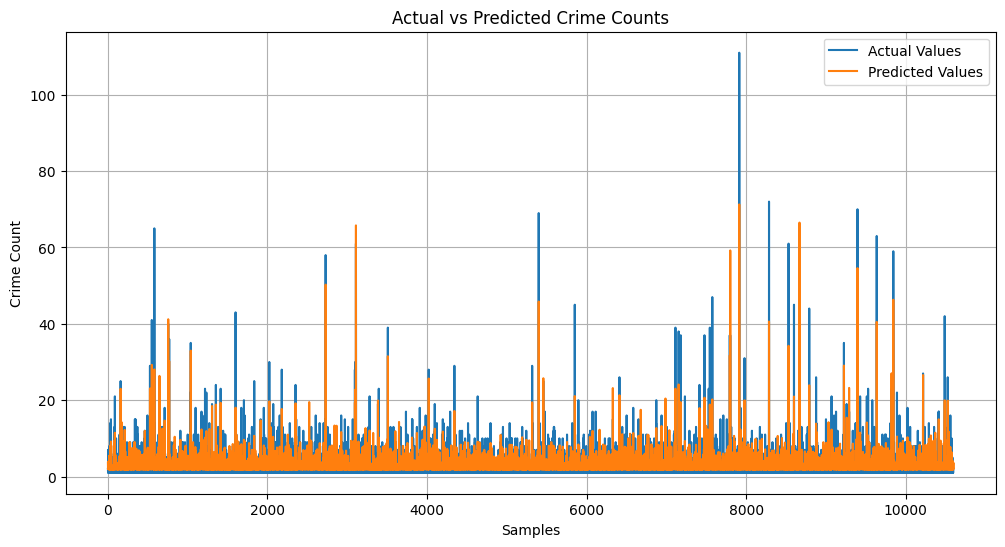

In [25]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()


### Residual Plot

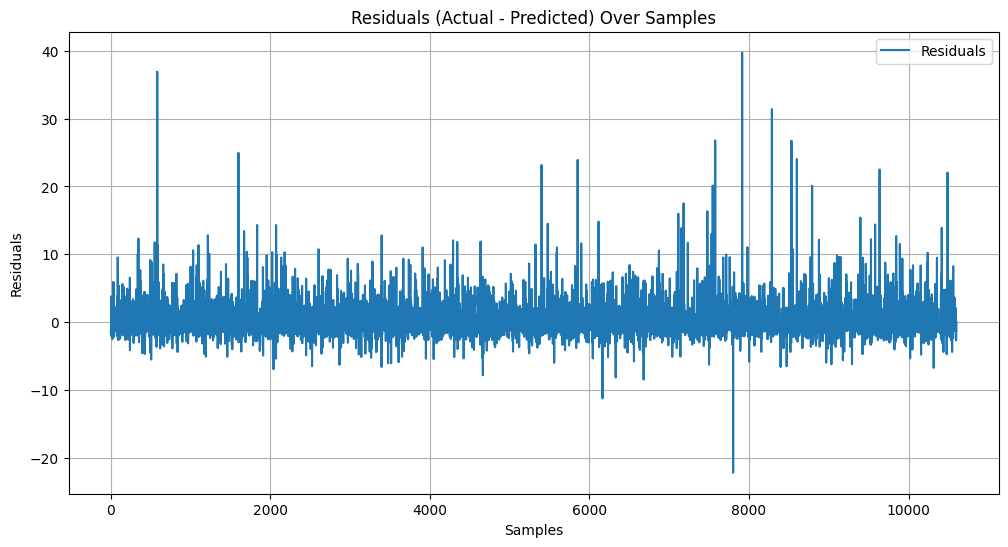

In [26]:
# Calculating residuals
residuals = y_test.flatten() - y_pred.flatten()

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals (Actual - Predicted) Over Samples')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()
